### Importing all the Libriaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset and performing EDA

In [134]:
df = pd.read_csv("p1.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [135]:
df.shape

(205, 26)

In [136]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Checking for null values

In [137]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

as there are no null values we do not need to perform replacing

In [138]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [139]:
encoders = {}

str_cols = df.select_dtypes(include=["object", "category"]).columns

for col in str_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [140]:
num_cols = df.select_dtypes(include=["int64", "float64", "int32", "float32", "int16"]).columns.tolist()
num_cols

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

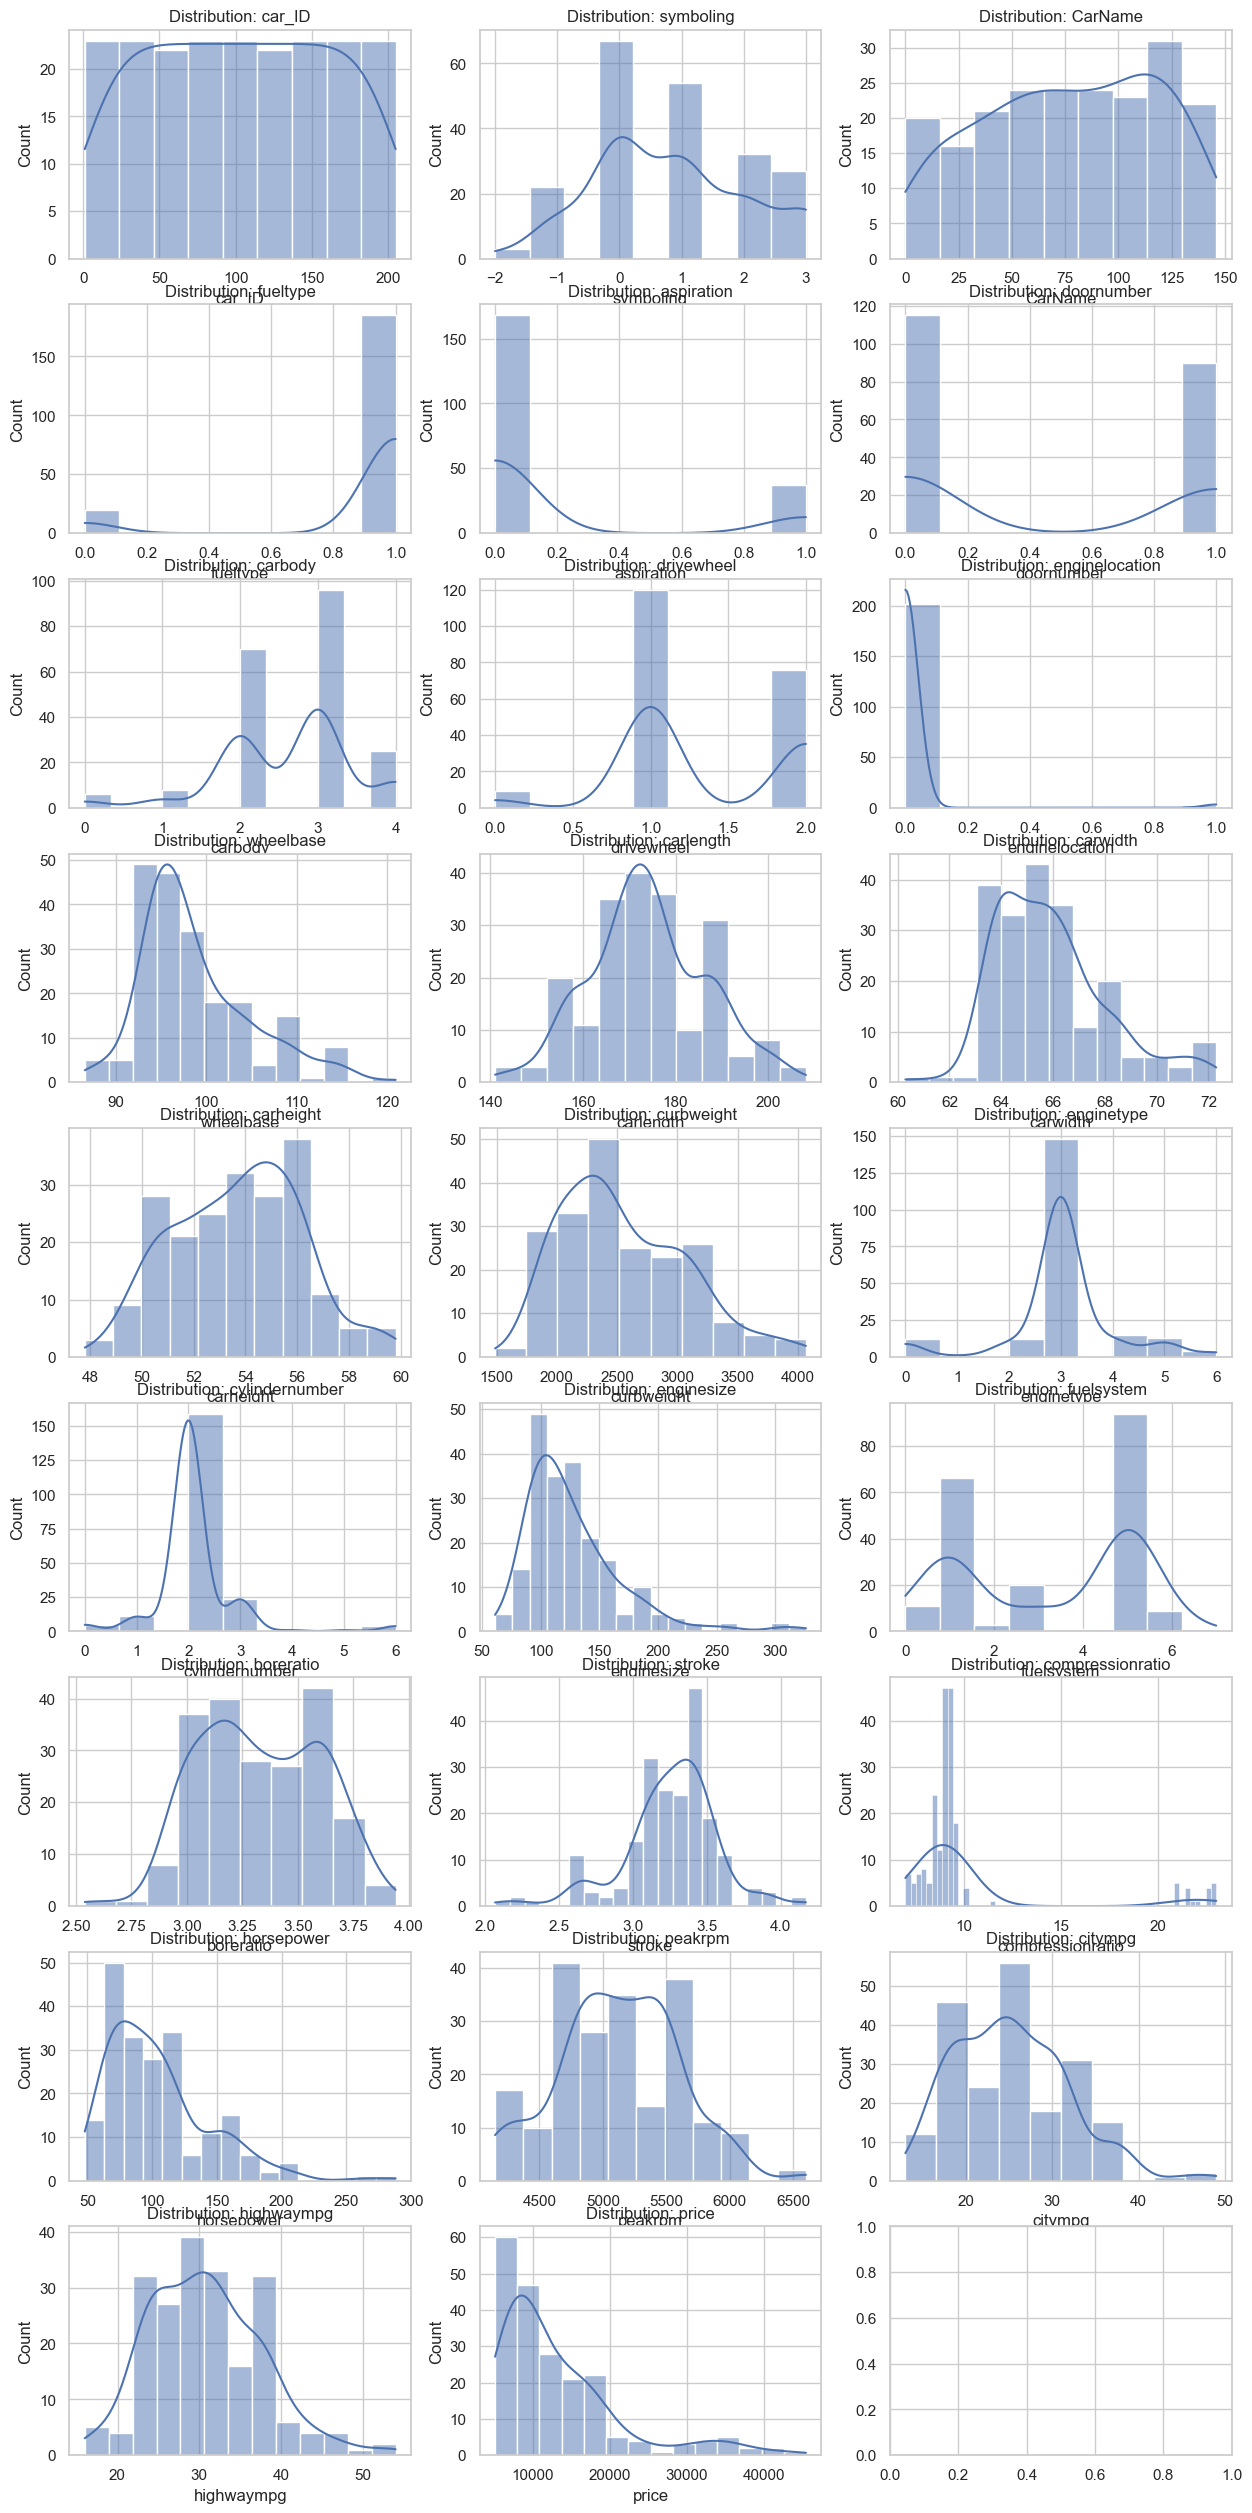

In [141]:
ncols, nrows = 3, 9
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.5*nrows))
axes = axes.flatten() if isinstance(axes, (list, tuple, np.ndarray)) else [axes]
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution: {col}")

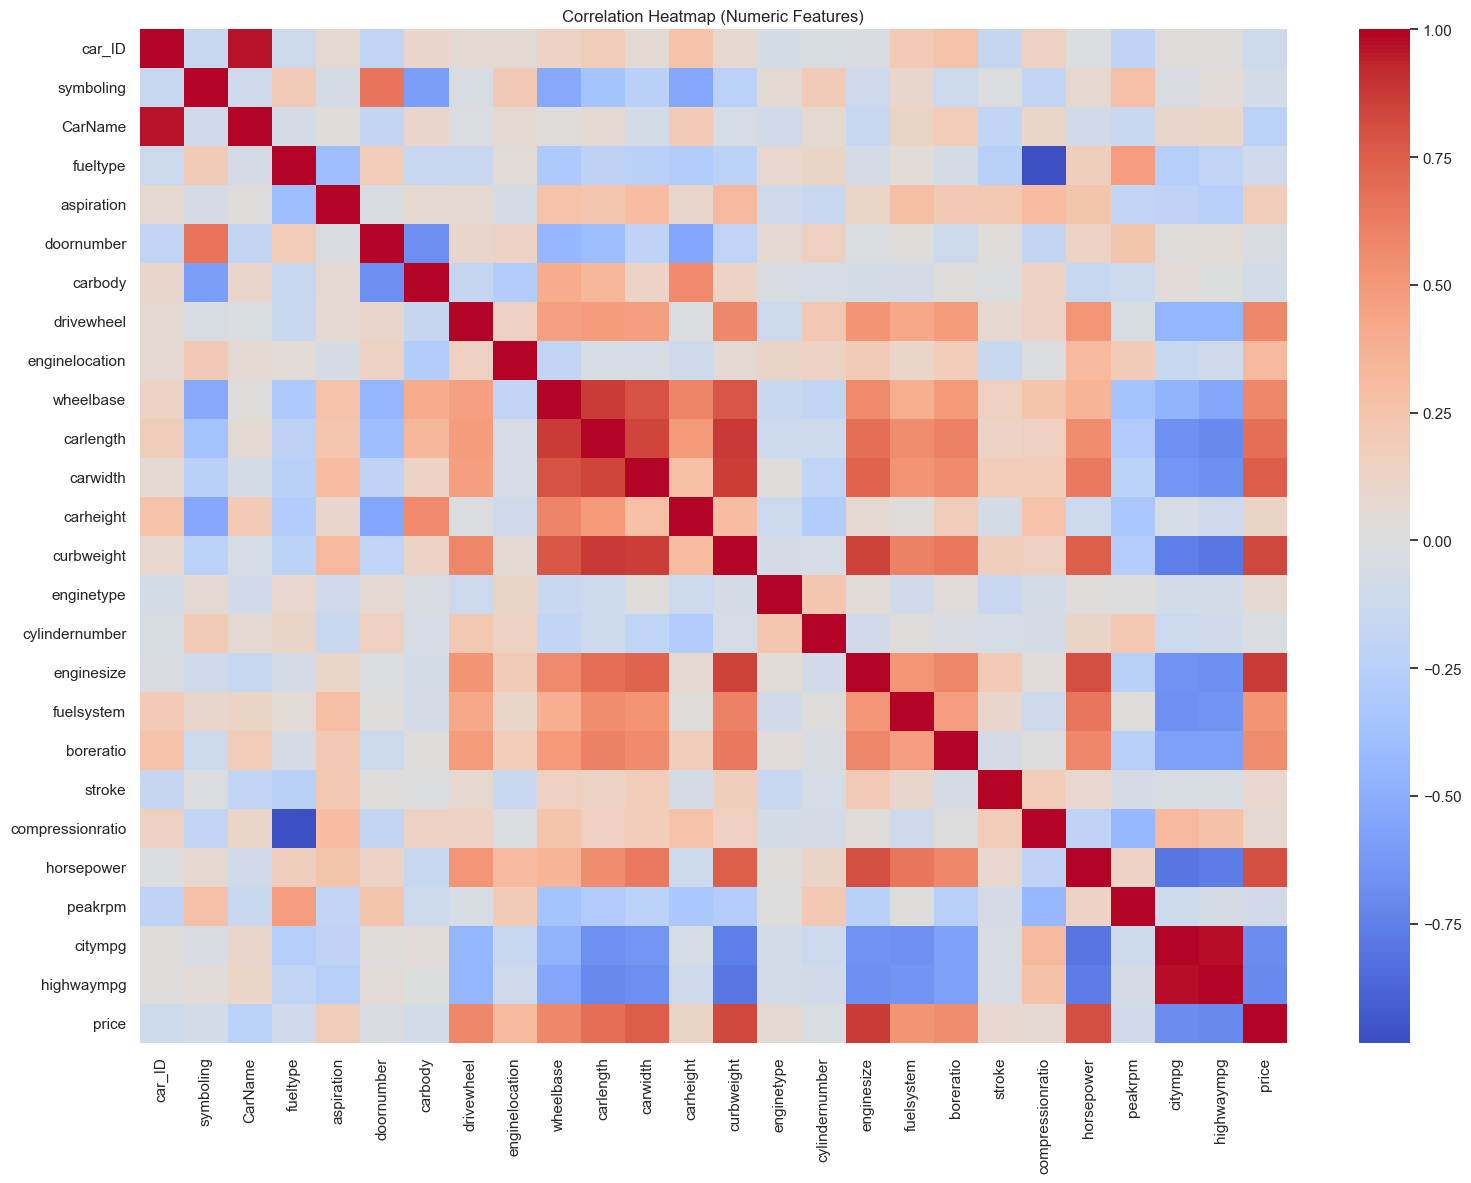

In [142]:
plt.figure(figsize=(16, 12))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, square=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

In [143]:
corr['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
car_ID             -0.109093
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [144]:
iv = [c for c in corr.columns if c != 'price' and (corr.loc['price', c] > 0.01 or corr.loc['price', c] < -0.01)]
iv.remove('car_ID')
iv

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [145]:
X = df[['enginesize']]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [146]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
y_pred = lr.predict(X_test)

mse  = mean_squared_error(Y_test, y_pred)
r2   = r2_score(Y_test, y_pred)

print(f"  Intercept : {lr.intercept_:.2f}")
print(f"  Slope     : {lr.coef_[0]:.2f}")
print(f"  MSE      : {mse:.2f}")
print(f"  R²       : {r2:.4f}")

  Intercept : -7741.77
  Slope     : 165.84
  MSE      : 15465458.97
  R²       : 0.8041


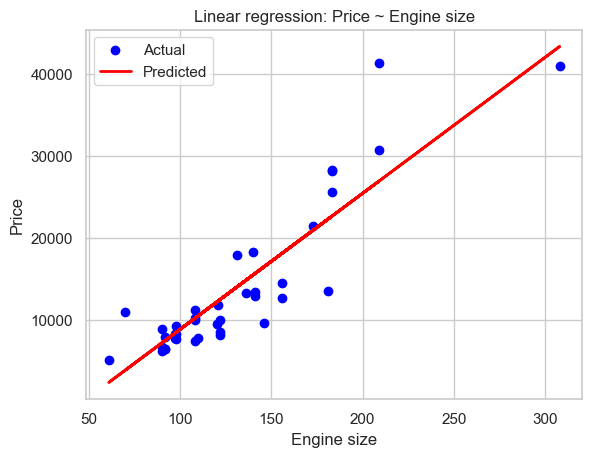

In [148]:
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.title('Linear regression: Price ~ Engine size')
plt.legend()
plt.show()

In [149]:
X = df[iv]

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)

In [151]:
mlr = LinearRegression()

mlr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [152]:
y_pred = mlr.predict(X_test)

mmse  = mean_squared_error(Y_test, y_pred)
mr2   = r2_score(Y_test, y_pred)

print(f"Intercept: {mlr.intercept_:.2f}")
for col, coef in zip(iv, mlr.coef_):
    print(f"  {col:12s} : {coef: .4f}")
print(f"MSE : {mmse:.2f}")
print(f"R Sq  : {mr2:.4f}")

Intercept: -74234.03
  symboling    :  152.6939
  CarName      : -27.1620
  fueltype     :  10945.4046
  aspiration   :  1120.0726
  doornumber   : -1498.9797
  carbody      : -1142.9836
  drivewheel   :  840.1321
  enginelocation :  11523.6998
  wheelbase    :  177.7584
  carlength    : -52.5323
  carwidth     :  569.4644
  carheight    :  199.7364
  curbweight   :  2.6738
  enginetype   :  282.7208
  cylindernumber : -254.3895
  enginesize   :  79.2383
  fuelsystem   :  131.9904
  boreratio    : -844.1303
  stroke       : -1948.5553
  compressionratio :  931.2000
  horsepower   :  18.5768
  peakrpm      :  1.3008
  citympg      : -159.9188
  highwaympg   :  80.6687
MSE : 12575220.83
R Sq  : 0.8407


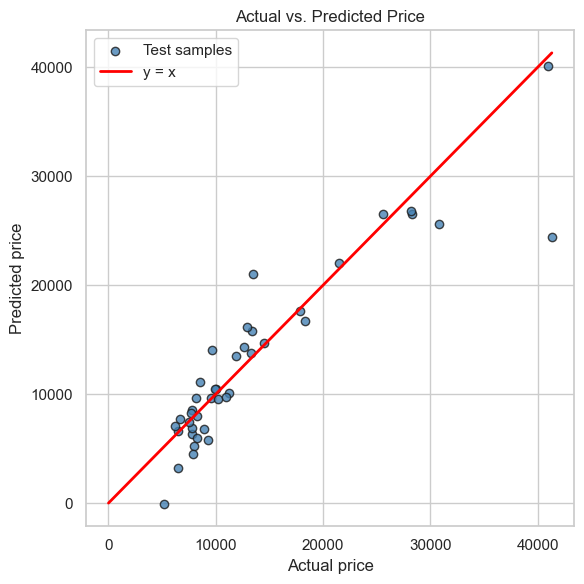

In [153]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, color='steelblue', edgecolor='k', alpha=0.8, label='Test samples')
lim = np.max([Y_test.max(), y_pred.max()])
plt.plot([0, lim], [0, lim], color='red', lw=2, label='y = x')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.tight_layout()
plt.show()

In [154]:
print(f"Multiple LR is {(mse - mmse)/mmse*100}% better then Single LR in MSE")
print(f"Single LR is {-(r2 - mr2)/mr2*100}% better then Multiple LR in R Squared")

Multiple LR is 22.983597488657367% better then Single LR in MSE
Single LR is 4.35481451533644% better then Multiple LR in R Squared


from this we can say that overall the result of multiple lr is better then single lr in the disance of errors but in terms of accuracy single lr is better